<h1 style='text-align:center'>Modeling Time Series</h1>

## Auto-regressive Time Series Model

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step. It is one of the simplest time series models in which we use a linear model to predict the value at the present time using the value at the previous time. 

<p style='text-align:center; font-size: 30px;'>𝑌<sub>t</sub>=𝜙<sub>1</sub>𝑌<sub>𝑡−1</sub>+𝜖<sub>𝑡</sub></p>

The numeral one (1) denotes that the next instance is solely dependent on the previous instance.  The 𝜙(phi) is a coefficient which we seek so as to minimize the error function.

The order of AR is the number of lag terms we are using to predict the present value (AR(1) uses only 1 lag - one value directly preceding the value you are trying to predict, AR(2) use the two values directly preceding the value you are trying to predict) 

#### How do we determine the order aka how many lag terms do we include? 

Using ACF and PACF! 

<img src='AR(1).png'>

## Moving Average Time Series Model

Sometimes, a past value is not a useful indicator of what value will come next. Consider a system that is subject to a lot of shocks/volatility. If a previous time period experiences a shock it may cause an error for future predictions if we just that value. A moving average model helps address this behavior. 

A moving average term in a time series model is a past error (multiplied by a coefficient).

An MA model assumes present value is related to errors in the past - includes memory of past errors


<p style='text-align: center; font-size:30px;'>𝑌<sub>t</sub>=μ + 𝜖<sub>𝑡</sub>+𝜃<sub>1</sub>𝜖<sub>𝑡−1</sub></p>

For more details on how this model is fit: https://stats.stackexchange.com/questions/26024/moving-average-model-error-terms/74826#74826 

## Differencing Model aka Integrated Model

The differenced value is equal to the present value minus the value at the next lag. A time series which needs to be differenced to be made stationary is said to be an "integrated" time series.

<p>If d=0:  y<sub>t</sub>  =  Y<sub>t</sub></p>

If d=1:  y<sub>t</sub> =  Y<sub>t</sub> - Y<sub>t-1</sub>

If d=2:  y<sub>t</sub> =  (Y<sub>t</sub> - Y<sub>t-1</sub>) - (Y<sub>t-1</sub> - Y<sub>t-2</sub>)  =  Y<sub>t</sub> - 2Y<sub>t-1</sub> + Y<sub>t-2</sub>

## ARIMA

Combines AR, Differencing (I), and MA

The differenced value is equal to the present value minus the value at the next lag. A time series which needs to be differenced to be made stationary is said to be an "integrated" time series.

<p style ='text-align:center; font-size: 30px;'>𝑌<sub>t</sub>=𝜙<sub>1</sub>𝑌<sub>𝑡−1</sub>+𝜙<sub>2</sub>𝑌<sub>𝑡−2</sub>...𝜙<sub>𝑝</sub>𝑌<sub>t−𝑝</sub>+𝜖<sub>𝑡</sub>+𝜃<sub>1</sub>𝜖<sub>𝑡−1</sub>+𝜃<sub>2</sub>𝜖<sub>𝑡−2</sub>+...𝜃<sub>𝑞</sub>𝜖<sub>𝑡−𝑞</sub></p>



ARIMA has three main parameters we need to input, p, d, & q

<b>p:</b> The number of AR terms we are going to include<br/>
<b>d:</b> The number of times we are differencing our data<br/>
<b>q:</b> The number MA terms we are going to include

In [1]:
import pandas as pd
from matplotlib import pyplot
pyplot.style.use('fivethirtyeight')

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


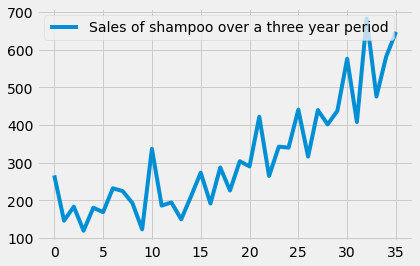

In [2]:
#read in csv
shampoo = pd.read_csv('data/shampoo.csv', header=0, usecols=[1])
#plot of data to see visualize trends
shampoo.plot()


In [3]:
#get differenced values
diff = shampoo.diff().rename(index=str, columns={"Sales of shampoo over a three year period": "Differenced Observations"})


In [4]:
#perform dickey fuller to see if our data is stationary
from statsmodels.tsa.stattools import adfuller
test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
dtype: float64


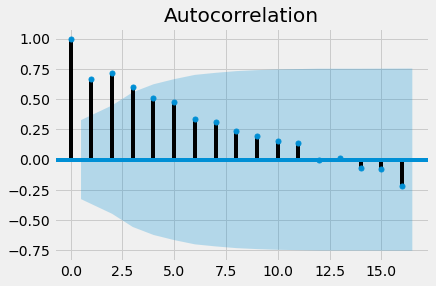

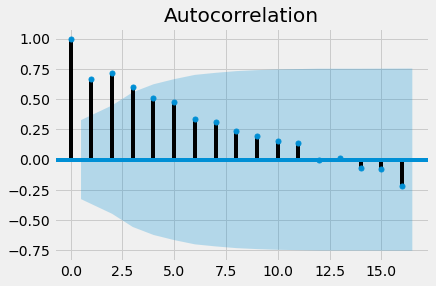

In [5]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(shampoo[:-1], alpha=.05)

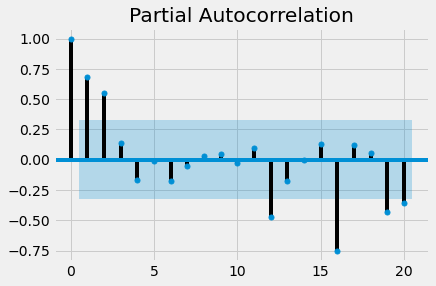

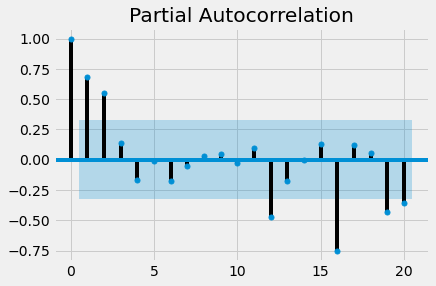

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(shampoo[:-1], alpha=.05, lags=20)

<b>AR(2)?</b> 

In [7]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))

model = ARIMA(shampoo[:-1], order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(3, 1, 0)   Log Likelihood                -197.346
Method:                                                css-mle   S.D. of innovations             66.848
Date:                                         Mon, 08 Jun 2020   AIC                            404.692
Time:                                                 15:46:21   BIC                            412.469
Sample:                                                      1   HQIC                           407.377
                                                                                                       
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [14]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))

model2 = ARIMA(shampoo[:-1], order=(7,1,1))
model_fit2 = model.fit(disp=0)
print(model_fit2.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(7, 1, 1)   Log Likelihood                -194.935
Method:                                                css-mle   S.D. of innovations             61.486
Date:                                         Mon, 08 Jun 2020   AIC                            409.870
Time:                                                 15:49:24   BIC                            425.424
Sample:                                                      1   HQIC                           415.239
                                                                                                       
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

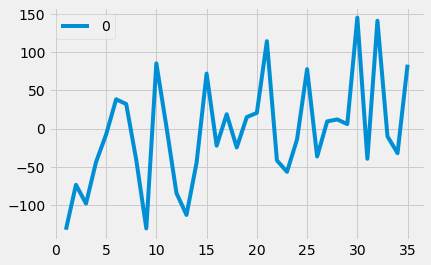

In [8]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

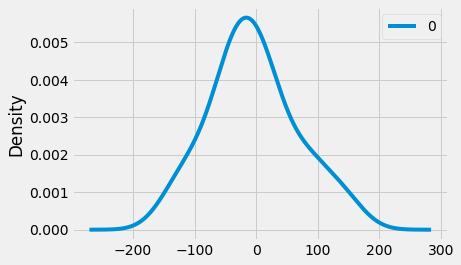

In [9]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
pyplot.show()

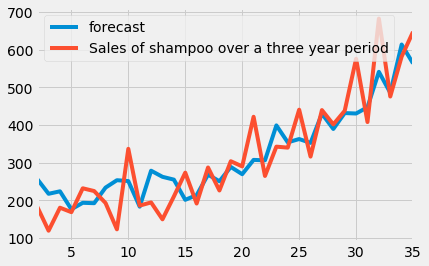

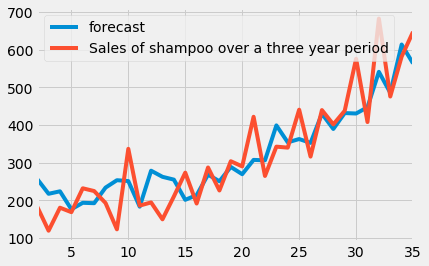

In [24]:
model_fit.plot_predict()

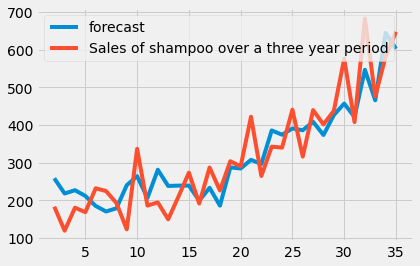

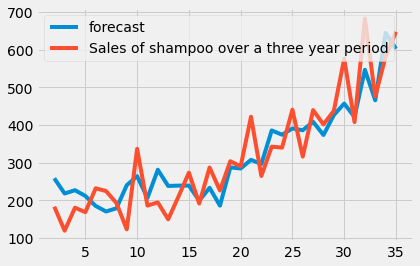

In [15]:
model_fit2.plot_predict()

In [25]:
shampoo.shape

(37, 1)

In [16]:
#forecasting the next periods
model_fit2.forecast()[0]

array([602.42656093])

In [17]:
#forecasting the next periods
model_fit.forecast()

(array([602.42656093]),
 array([61.48586503]),
 array([[481.91647992, 722.93664194]]))

## ARIMAX

ARIMA with eXogenous variables - extend ARIMA to include additional variables that might have an impact on what we are are trying to forecast. 

Considerations: 

1) Does our exogenous variable actually impact our endogenous variable (and not the other way around - use granger causality test) 

2) Exogenous variables need to be differenced at the same order as the endogenous 

<img src='seasonal_data.png'/>

### Steps to build an (S)ARIMA(X) Model

1) Plot data, see if there are trends <br/>
2) If trends, remove them (differencing, log transform, etc) <br/>
3) If seasonal trends are there determine periodicity. <br/>
3) ACF and PACF of  data <br/>
4) Determine order of differencing, AR, or MA (or both) <br/>
5) Build Model and Evaluate 
